To analazy if the patient or the adult person is asleep, awake or walking at the current movement

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sbn
from scipy import stats
import math
from tensorflow.keras import layers



%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Print versions
print('TensorFlow ' + tf.__version__)


TensorFlow 2.15.0


In [3]:
file_path = '/content/drive/MyDrive/dataset/Accelerometer_embedded_inteliigence_dataset.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)


df.head()


,Timestamp,X-Acceleration,Y-Acceleration,Z-Acceleration,Activity
0,18:43:50,X-Acceleration: -0.63 g,Y-Acceleration: -0.52 g,Z-Acceleration: 1.02 g,Sleeping
1,18:43:51,X-Acceleration: -0.63 g,Y-Acceleration: -0.51 g,Z-Acceleration: 1.02 g,Sleeping
2,18:43:52,X-Acceleration: -0.63 g,Y-Acceleration: -0.52 g,Z-Acceleration: 1.02 g,Sleeping
3,18:43:53,X-Acceleration: -0.62 g,Y-Acceleration: -0.53 g,Z-Acceleration: 1.02 g,Sleeping
4,18:43:54,X-Acceleration: -0.62 g,Y-Acceleration: -0.51 g,Z-Acceleration: 1.03 g,Sleeping


In [4]:
# summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       524 non-null    object
 1   X-Acceleration  524 non-null    object
 2   Y-Acceleration  524 non-null    object
 3   Z-Acceleration  524 non-null    object
 4   Activity        524 non-null    object
dtypes: object(5)
memory usage: 20.6+ KB


**Cleaning the Dataset and Preprocessing**

In [5]:
import re

# Expression to match numbers with decimals, plus and minus signs
pattern = re.compile(r'[-+]?\d*\.?\d+')
# Function to extract numbers from each string
def extract_numbers(text):
    return ''.join(pattern.findall(text))

# Applying the function to each column in the DataFrame
for column in df.columns:
    df['X-Acceleration'] = df['X-Acceleration'].apply(extract_numbers)
    df['Y-Acceleration'] = df['Y-Acceleration'].apply(extract_numbers)
    df['Z-Acceleration'] = df['Z-Acceleration'].apply(extract_numbers)



print(df)




    Timestamp X-Acceleration Y-Acceleration Z-Acceleration  \
0    18:43:50          -0.63          -0.52           1.02   
1    18:43:51          -0.63          -0.51           1.02   
2    18:43:52          -0.63          -0.52           1.02   
3    18:43:53          -0.62          -0.53           1.02   
4    18:43:54          -0.62          -0.51           1.03   
..        ...            ...            ...            ...   
519  18:52:39           0.64          -0.61           0.35   
520  18:52:40           0.45          -0.51           0.37   
521  18:52:41           0.47          -0.61           0.33   
522  18:52:42           0.81          -0.62           0.31   
523  18:52:43           0.97          -0.69           0.27   

                     Activity  
0                   Sleeping   
1                   Sleeping   
2                   Sleeping   
3                   Sleeping   
4                   Sleeping   
..                        ...  
519   walking down the stairs  

In [6]:
df.head()

,Timestamp,X-Acceleration,Y-Acceleration,Z-Acceleration,Activity
0,18:43:50,-0.63,-0.52,1.02,Sleeping
1,18:43:51,-0.63,-0.51,1.02,Sleeping
2,18:43:52,-0.63,-0.52,1.02,Sleeping
3,18:43:53,-0.62,-0.53,1.02,Sleeping
4,18:43:54,-0.62,-0.51,1.03,Sleeping


In [9]:
#converting into float
df['X-Acceleration'] = df['X-Acceleration'].astype(float)
df['Y-Acceleration'] = df['Y-Acceleration'].astype(float)
df['Z-Acceleration'] = df['Z-Acceleration'].astype(float)
print(df.dtypes)

Timestamp           int32
X-Acceleration    float64
Y-Acceleration    float64
Z-Acceleration    float64
Activity           object
dtype: object


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%H:%M:%S')

# Extracting hours, minutes, and seconds and converting them into seconds
df['Timestamp'] = df['Timestamp'].dt.hour * 3600 + df['Timestamp'].dt.minute * 60 + df['Timestamp'].dt.second



In [11]:
print(df)

print(df.dtypes)

     Timestamp  X-Acceleration  Y-Acceleration  Z-Acceleration  \
0        67430           -0.63           -0.52            1.02   
1        67431           -0.63           -0.51            1.02   
2        67432           -0.63           -0.52            1.02   
3        67433           -0.62           -0.53            1.02   
4        67434           -0.62           -0.51            1.03   
..         ...             ...             ...             ...   
519      67959            0.64           -0.61            0.35   
520      67960            0.45           -0.51            0.37   
521      67961            0.47           -0.61            0.33   
522      67962            0.81           -0.62            0.31   
523      67963            0.97           -0.69            0.27   

                     Activity  
0                   Sleeping   
1                   Sleeping   
2                   Sleeping   
3                   Sleeping   
4                   Sleeping   
..             

Exploratory Data Analysis

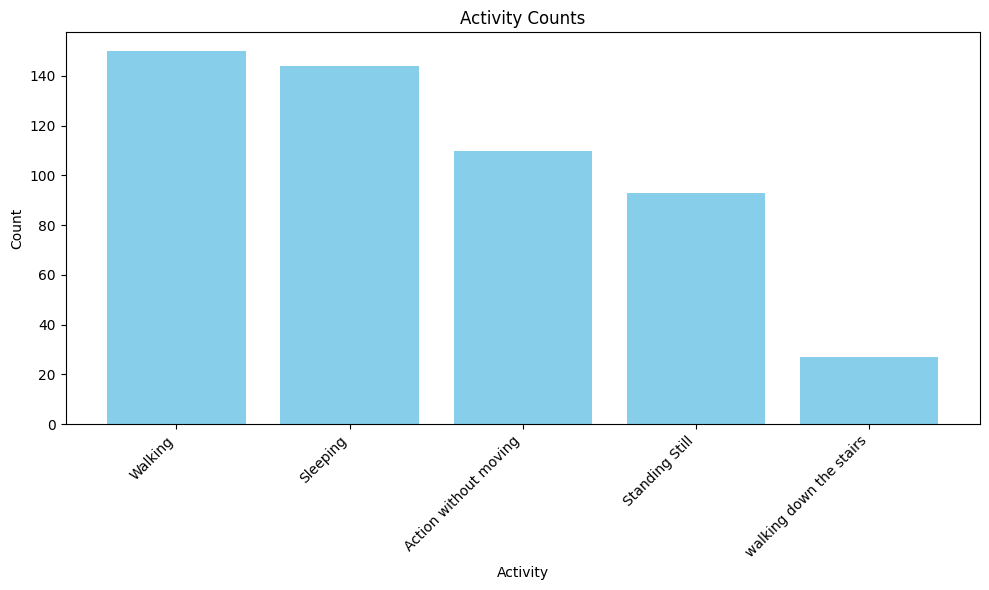

In [13]:
activities = ['Walking', 'Sleeping', 'Action without moving', 'Standing Still', 'walking down the stairs']
counts = [150, 144, 110, 93, 27]

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(activities, counts, color='skyblue')  # Create the bar plot
plt.xlabel('Activity')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.title('Activity Counts')  # Title for the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot


In [14]:
#timestamp is not necessary
df.drop(columns=['Timestamp'], inplace=True)
ActivityCounts = df['Activity'].value_counts()
print(ActivityCounts)

Activity
 Walking                    150
 Sleeping                   144
 Action without moving      110
 Standing Still              93
 walking down the stairs     27
Name: count, dtype: int64


In [15]:

#in order to convert the model into C++
! pip install "everywhereml>=0.2.32"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.8 MB/s eta 0:00:00
  Created wheel for everywhereml: filename=everywhereml-0.2.39-py3-none-any.whl size=81224 sha256=ea6b3d617b7b52cdf367b280dde1d0bc054c9ba86a998fe4359b5844bdf3f33c
  Stored in directory: /root/.cache/pip/wheels/96/16/0d/c55612f3c08c6ed348c45c7de6018dac22ea839124bc507ced
  Created wheel for hexdump: filename=hexdump-3.3-py3-none-any.whl size=8896 sha256=220758637835a6bec31539cde6d5ccded62cc37caec65dd61390afe15a772cad
  Stored in directory: /root/.cache/pip/wheels/26/28/f7/f47d7ecd9ae44c4457e72c8bb617ef18ab332ee2b2a1047e87
Successfully built everywhereml hexdump


Splitting dataset

In [17]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np



# Define features (X) and target (y)
X = df.drop(columns=["Activity"])  # Features
X = np.asarray(X)
#normalizing X
X = MinMaxScaler().fit_transform(X)



y = df["Activity"]  # Target
y_array = np.array(y)
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y_array.reshape(-1, 1))
# Convert the encoded result to integer type
y_encoded = y_encoded.astype(int)
#Printing the shapes to confirm transformation
print("Shape of y_array:", y_array.shape)
print("Shape of y_encoded:", y_encoded.shape)
y= y_encoded

# Print the encoded array
print("Encoded y:", y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)





Shape of y_array: (524,)
Shape of y_encoded: (524, 5)
Encoded y: [[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [18]:

print(y)


[0 0 1 0 0]


In [19]:
#defining my model
def model_structure(input_shape, num_classes):
  model = tf.keras.Sequential()
  model.add(layers.Dense(32, activation='relu', input_shape=input_shape))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


  return model

In [21]:
print(y.dtype)


int64


In [22]:
# Train model
input_shape = X.shape[1:]
num_classes = y.shape[1]
print("Shape of X:", X.shape)#shape of X
print("Shape of y:", y.shape)
model = model_structure(input_shape, num_classes)
history = model.fit(X_train, y_train, epochs=500, batch_size=10)


Shape of X: (524, 3)
Shape of y: (524, 5)
Epoch 1/500
42/42 [==============================] - 1s 3ms/step - loss: 1.5285 - accuracy: 0.4272
Epoch 2/500
42/42 [==============================] - 0s 3ms/step - loss: 1.3808 - accuracy: 0.5537
Epoch 3/500
42/42 [==============================] - 0s 3ms/step - loss: 1.2199 - accuracy: 0.5537
Epoch 4/500
42/42 [==============================] - 0s 3ms/step - loss: 1.0954 - accuracy: 0.5537
Epoch 5/500
42/42 [==============================] - 0s 3ms/step - loss: 1.0221 - accuracy: 0.5609
Epoch 6/500
42/42 [==============================] - 0s 3ms/step - loss: 0.9695 - accuracy: 0.5967
Epoch 7/500
42/42 [==============================] - 0s 3ms/step - loss: 0.9351 - accuracy: 0.6181
Epoch 8/500
42/42 [==============================] - 0s 2ms/step - loss: 0.9061 - accuracy: 0.6277
Epoch 9/500
42/42 [==============================] - 0s 2ms/step - loss: 0.8808 - accuracy: 0.6372
Epoch 10/500
42/42 [==============================] - 0s 2ms/step -

In [25]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np


# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate the accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display a confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Display a classification report
class_report = classification_report(true_classes, predicted_classes)
print("Classification Report:")
print(class_report)



4/4 [==============================] - 0s 4ms/step
Accuracy: 0.86
Confusion Matrix:
[[10  1  1  2  2]
 [ 0 29  0  0  0]
 [ 1  0 23  0  0]
 [ 6  0  0 27  0]
 [ 1  0  1  0  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59        16
           1       0.97      1.00      0.98        29
           2       0.92      0.96      0.94        24
           3       0.93      0.82      0.87        33
           4       0.33      0.33      0.33         3

    accuracy                           0.86       105
   macro avg       0.74      0.75      0.74       105
weighted avg       0.86      0.86      0.86       105



In [ ]:
# Save the model with a .keras extension
model.save('/content/drive.keras')


In [ ]:
# Convert the model to tf lite.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# Save the model as a tflite file.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


In [ ]:
# Convert TFLite model to C byte array without everywhereml
!xxd -i model.tflite > mymodel_data.h


In [27]:
from everywhereml.code_generators.tensorflow import convert_model
#checks the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



#convert to C++ model file
c_header = convert_model(model, X, y, model_name='Accelerometer_model')
print(c_header)

Shape of X: (524, 3)
Shape of y: (524, 5)
#pragma once

#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

// automatically configure network
#define TF_NUM_INPUTS 3
#define TF_NUM_OUTPUTS 5
#define TF_NUM_OPS 2
#define TF_OP_FULLYCONNECTED
#define TF_OP_SOFTMAX




// sample data
float x0[3] = {0.66666666667f, 0.57983193277f, 0.34246575342f};
float x1[3] = {0.11363636364f, 0.63865546218f, 0.98630136986f};
float x2[3] = {0.69696969697f, 0.59663865546f, 0.50684931507f};
float x3[3] = {0.68939393939f, 0.86554621849f, 0.54794520548f};
float x4[3] = {0.67045454545f, 0.71428571429f, 0.52054794521f};


/** model size = 5056 bytes **/
const unsigned char Accelerometer_model[] DATA_ALIGN_ATTRIBUTE = { 0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20,